In [16]:
import pandas as pd
import seaborn as sns
import operator
import string
import re
from collections import Iterable
from matplotlib import pyplot as plt
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Datasets/COVID Chat Bot/covid_df.csv')

In [0]:
def preprocess(docs):
  lemmer = WordNetLemmatizer()
  prepd = []

  for doc in docs:
    tokenized = word_tokenize(doc)

    cleaned = [lemmer.lemmatize(token.lower(), get_wordnet_pos(token))
               for token in tokenized
               if token.lower() not in stopwords.words('english')
               if token.lower() not in string.punctuation]
    cleaned2 = [re.sub('[^A-Za-z0-9]+', '', token).strip() for token in cleaned
                if len(token)>1]

    untokenized = ' '.join(cleaned2)
    prepd.append(untokenized)

  return prepd

In [0]:
# def preprocess(docs):
#   cleaned_docs = []

#   for doc in docs:
#     tokens = word_tokenize(doc)
#     doc_list = []

#     for token in tokens:
#       if token.lower() not in stopwords.words('english') and token.lower().isalpha():
#         doc_list.append(token.lower())

#     docs_joined = ' '.join(doc_list)
#     cleaned_docs.append(docs_joined)

#   return cleaned_docs

In [0]:
def q_stats(corpus):
  print(f'There are {len(corpus)} questions.')
  print(f'There are {(sum([len(question.split()) for question in corpus]))/(len(corpus)):.2f} words per question.')
  print(f'There are {(sum([len(question) for question in corpus]))/(len(corpus)):.2f} characters per question.')
  print(f'There are {sum([len(question.split()) for question in corpus])} words.')
  print(f'There are {len(set(q_string.split()))} unique words.')
  print(f'There are {sum([len(question) for question in corpus])} characters.')
  print(f'There are {(sum([len(question) for question in corpus]))/(sum([len(question.split()) for question in corpus])):.2f} characters per word.')
  print(f'The lexical diversity within the questions is {(len(set(q_string.split())))/(sum([len(question.split()) for question in corpus])):.4f}.')


In [0]:
def a_stats(corpus):
  print(f'There are {len(corpus)} answers.')
  print(f'There are {(sum([len(answer.split()) for answer in corpus]))/(len(corpus)):.2f} words per answer.')
  print(f'There are {(sum([len(answer) for answer in corpus]))/(len(corpus)):.2f} characters per answer.')
  print(f'There are {sum([len(answer.split()) for answer in corpus])} words.')
  print(f'There are {len(set(a_string.split()))} unique words.')
  print(f'There are {sum([len(answer) for answer in corpus])} characters.')
  print(f'There are {(sum([len(answer) for answer in corpus]))/(sum([len(answer.split()) for answer in corpus])):.2f} characters per word.')
  print(f'The lexical diversity within the answers is {(len(set(a_string.split())))/(sum([len(answer.split()) for answer in corpus])):.4f}.')

In [0]:
def get_wordnet_pos(word):
  #Map POS tag to first character lemmatize() accepts
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "R": wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

In [23]:
nltk.pos_tag(['log'])

[('log', 'NN')]

In [0]:
# def flatten(lis):
#      for item in lis:
#          if isinstance(item, Iterable) and not isinstance(item, str):
#              for x in flatten(item):
#                  yield x
#          else:        
#              yield item

In [0]:
question_list = list(df['questions'])
answer_list = list(df['answers'])

In [0]:
questions = preprocess(question_list)

In [0]:
variable = " ".join(question_list)
tokenize = word_tokenize(variable)
tagged_list = nltk.pos_tag(tokenize)
# for sentence in questions:
#   tokenize = word_tokenize(sentence)
#   pos = nltk.pos_tag(tokenize)
#   tagged_list.append(pos)

  # for token in tokenize:
  #   if token in wordnet.ADJ:
  #     adjectives.append(token)
  #   elif token in wordnet.ADV:
  #     adverbs.append(token)
  #   elif token in wordnet.VERB:
  #     verbs.append(token)
  #   else:
  #     print(token)


In [0]:
words_df = pd.DataFrame(tagged_list)

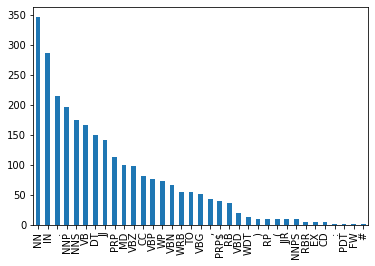

In [29]:
words_df[1].value_counts().plot(kind='bar')

In [38]:
q_stats(question_list)

There are 207 questions.
There are 11.30 words per question.
There are 65.25 characters per question.
There are 2339 words.
There are 397 unique words.
There are 13507 characters.
There are 5.77 characters per word.
The lexical diversity within the questions is 0.1697.


In [39]:
a_stats(answer_list)

There are 207 answers.
There are 95.41 words per answer.
There are 602.14 characters per answer.
There are 19749 words.
There are 2054 unique words.
There are 124644 characters.
There are 6.31 characters per word.
The lexical diversity within the answers is 0.1040.


In [0]:
# def word_count(str):
#     counts = dict()
#     words = str.split()

#     for word in words:
#         if word in counts:
#             counts[word] += 1
#         else:
#             counts[word] = 1

#     return sorted(counts.items(), key=operator.itemgetter(1),reverse=True)

In [0]:
q_string_prep = preprocess(question_list)
a_string_prep = preprocess(answer_list)

In [0]:
q_string = " ".join(q_string_prep)
a_string = " ".join(a_string_prep)

In [0]:
q_tokens = word_tokenize(q_string)
a_tokens = word_tokenize(a_string)

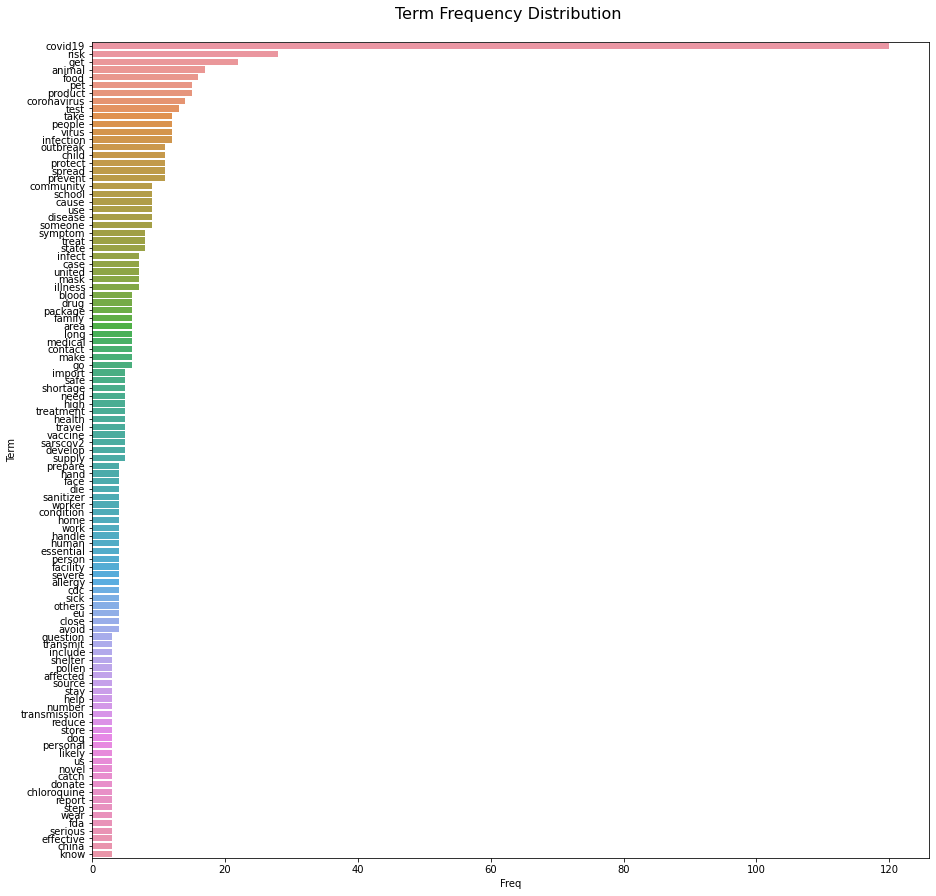

In [34]:
fdist = FreqDist(q_tokens)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filter_a = ordered[ordered['Freq'] > 2]

# filtered.plot(x='Term', y='Freq', kind='barh')
plt.figure(figsize=(15,15));
sns.barplot(data=filter_a, x='Freq', y='Term');
plt.title('Term Frequency Distribution \n', fontsize=16);

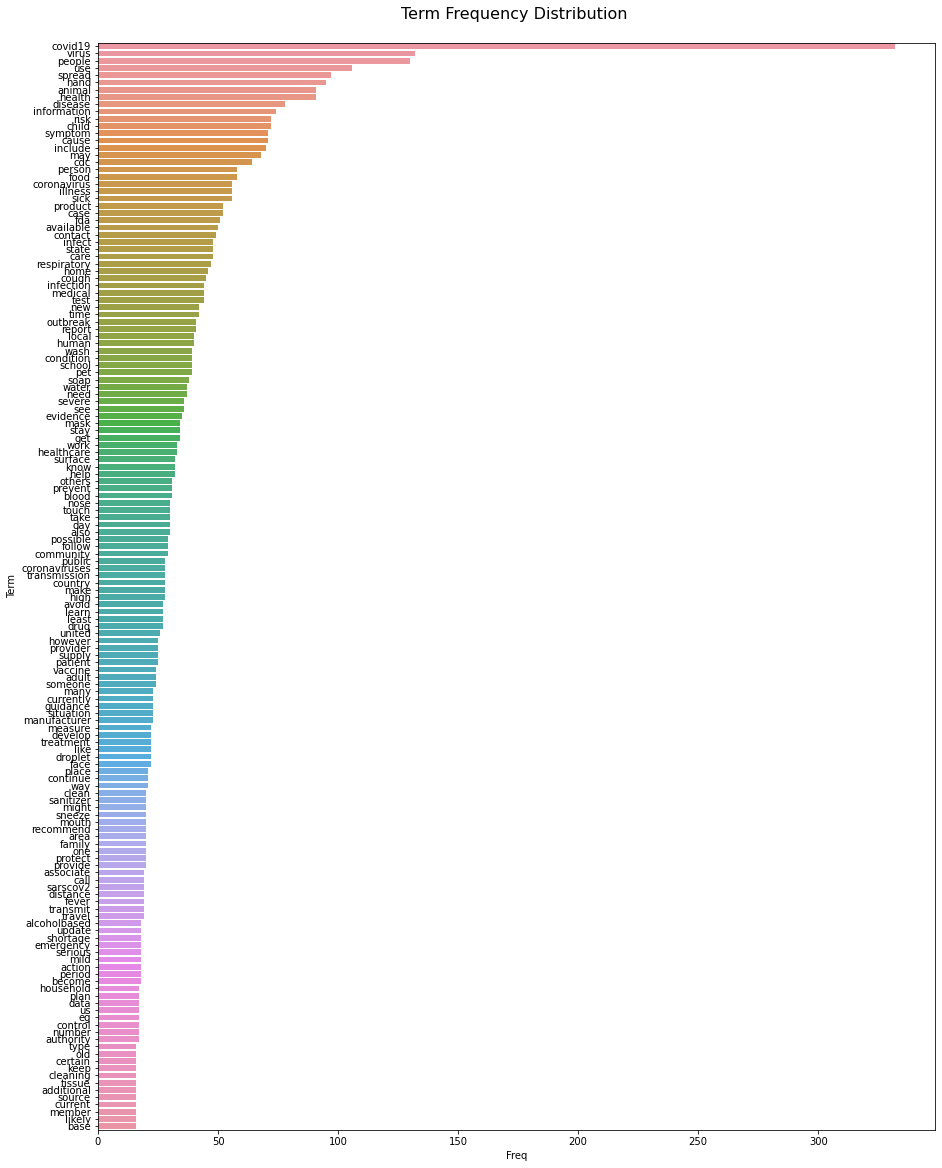

In [35]:
fdist = FreqDist(a_tokens)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filter_a = ordered[ordered['Freq'] > 15]

# filtered.plot(x='Term', y='Freq', kind='barh')
plt.figure(figsize=(15,20));
sns.barplot(data=filter_a, x='Freq', y='Term');
plt.title('Term Frequency Distribution \n', fontsize=16);

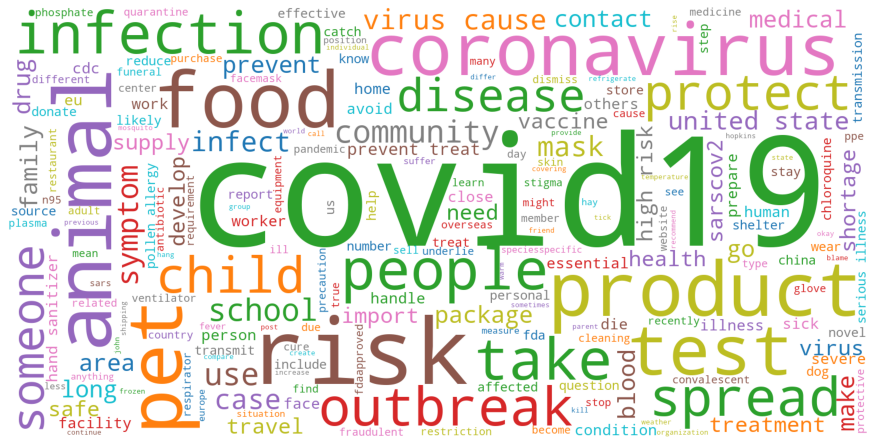

In [36]:
def word_cloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12, 10))
  plt.imshow(cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()


word_cloud(q_string)

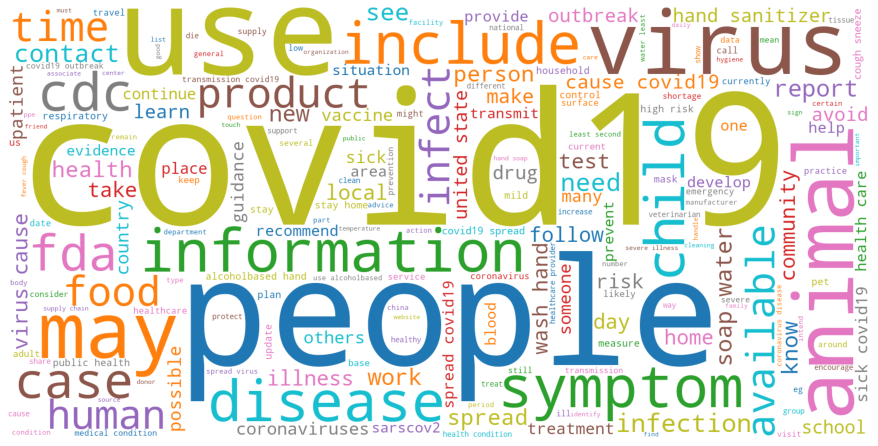

In [37]:
word_cloud(a_string)

In [0]:
mystring = ['This is a string', 'and this is another string']
print(len(mystring))
for string in mystring:
  print(len(string))

total = []
for string in mystring:
  characters = len(string)
  total.append(characters)
print(sum(total))

In [0]:
sum([len(question) for question in question_list])

In [0]:
single_string = " ".join(question_list)

In [0]:
len(set(single_string.split()))